<a href="https://colab.research.google.com/github/madrigaljose/madrigaljose/blob/main/20210711_Madrigal_FromRegrToRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## From Regression to RNN

Learning objectives:
* [Objective 1] ARIMA
* [Objective 2] RNN requires a 3-D tensor as input
* [Objective 3] Stock data
* [Objective 4] Create the training and test data for RNN/LSTM
* [Objective 5] Run a simple RNN model
* [Objective 6] RNN/LTSM requires normalized input data
* [Objective 7] LSTM
* [Objective 8] LSTM Regularization
* [Objective 9] GRU
* [Objective 10] GRU Regularization

Note: Every run of the following code may vary.

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
#from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### [Learning Objective 1] ARIMA()

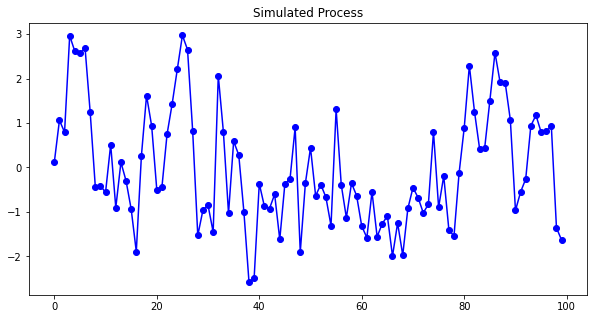

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
#from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Generate the data
import numpy as np
ar = np.array([1, -0.8, 0.2])
ma = np.array([1])
my_simulation = ArmaProcess(ar, ma).generate_sample(nsample=100)

plt.figure(figsize=[10, 5]); # Set dimensions for figure
plt.plot(my_simulation, linestyle='-', marker='o', color='b')
plt.title("Simulated Process")
plt.show()

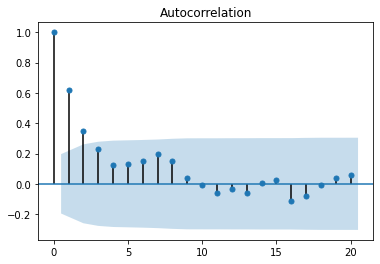

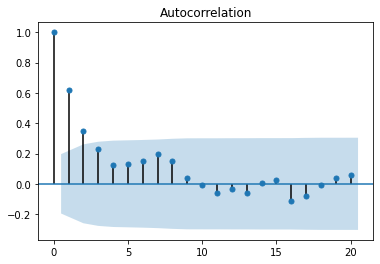

In [ ]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
plot_acf(my_simulation)

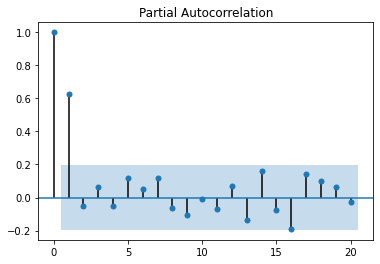

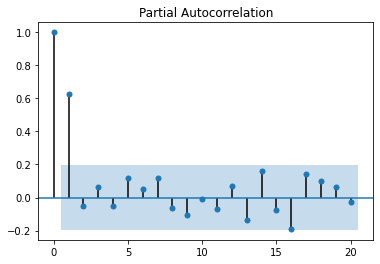

In [ ]:
plot_pacf(my_simulation)

In [ ]:
#import warnings
#import statsmodels.api as sm
#from statsmodels.tsa.arima_model import ARMA#

#mod = sm.tsa.arima.ARIMA(my_simulation, order=(2, 0, 0))
#mod_fit = mod.fit()
#print(mod_fit.summary())

### [Learning Objective 2] RNN requires a 3-D tensor as input
* Tensor: One tensor is a vector that enters the model
* Time Step: One time step is one observation in the tensor.
* Feature: One feature is one observation at a time step.

In [ ]:
array = np.random.random(20) #.astype(np.float32
array.reshape((1,20,1))
array

array([0.32936279, 0.84670181, 0.21601031, 0.10764548, 0.27366403,
       0.53789983, 0.65597251, 0.22666852, 0.48508786, 0.18268185,
       0.02420704, 0.22681851, 0.16008219, 0.73895289, 0.25733221,
       0.62567349, 0.66012546, 0.49342354, 0.21109282, 0.43234779])

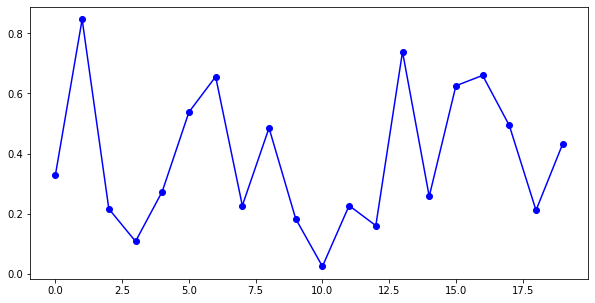

In [ ]:
plt.figure(figsize=[10, 5]); # Set dimensions for figure
plt.plot(array, linestyle='-', marker='o', color='b')
plt.show()

In [ ]:
array.reshape((4,5,1))

array([[[0.32936279],
        [0.84670181],
        [0.21601031],
        [0.10764548],
        [0.27366403]],

       [[0.53789983],
        [0.65597251],
        [0.22666852],
        [0.48508786],
        [0.18268185]],

       [[0.02420704],
        [0.22681851],
        [0.16008219],
        [0.73895289],
        [0.25733221]],

       [[0.62567349],
        [0.66012546],
        [0.49342354],
        [0.21109282],
        [0.43234779]]])

In [ ]:
array.reshape((2,5,2))

array([[[0.32936279, 0.84670181],
        [0.21601031, 0.10764548],
        [0.27366403, 0.53789983],
        [0.65597251, 0.22666852],
        [0.48508786, 0.18268185]],

       [[0.02420704, 0.22681851],
        [0.16008219, 0.73895289],
        [0.25733221, 0.62567349],
        [0.66012546, 0.49342354],
        [0.21109282, 0.43234779]]])

In [ ]:
# Example 1
array = np.random.random(20) #.astype(np.float32
array.reshape((1,20,1))

# Example 2
array.reshape((4,5,1))

# Example 3
array.reshape((2,5,2))

array([[[0.14941883, 0.02833922],
        [0.53499448, 0.69043093],
        [0.91711495, 0.73859673],
        [0.94676785, 0.77114509],
        [0.48845724, 0.77604082]],

       [[0.99632565, 0.29185511],
        [0.21101335, 0.05368326],
        [0.85995229, 0.20795748],
        [0.12963128, 0.57337986],
        [0.12339651, 0.88309634]]])

* use numpy to store and manipulate image data. 
* We will use the Python Imaging library (PIL) to read and write data to standard file formats.
* 4 lines of pixels, each line of pixels contains 5 pixels, and each pixel contains 3 bytes (red, green, blue)
* The shape of the array is: height x width x 3.

In [ ]:
# IF it is image data:
# Create an RGB image that is 3 dimensional arrays of 8-bit unsigned integers.
width = 5
height = 4
RGB = 3
p = width * height * RGB
img_data = np.random.randint(100,high=255, size=p, dtype=np.uint8) # Generate values in (100,255)
img_data = img_data.reshape((height, width, RGB))
img_data

array([[[241, 235, 133],
        [127, 114, 114],
        [181, 253, 249],
        [247, 153, 193],
        [209, 190, 221]],

       [[114, 175, 242],
        [171, 158, 122],
        [108, 224, 118],
        [240, 222, 102],
        [135, 128, 234]],

       [[168, 254, 169],
        [115, 146, 170],
        [103, 198, 152],
        [207, 102, 224],
        [210, 244, 102]],

       [[163, 209, 137],
        [238, 250, 142],
        [126, 193, 233],
        [140, 102, 139],
        [123, 108, 238]]], dtype=uint8)

In [ ]:
from PIL import Image
img = Image.fromarray( img_data)
img.show()

### [Learning Objective 3] Stock data

In [ ]:
!pip install pandas-datareader
!pip install yfinance --upgrade --no-cache-dir
import pandas_datareader.data as pdr
import yfinance as yf

     |████████████████████████████████| 6.3MB 12.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=45797ca830cf780521d23ed46438a53eff8ae88b6099626b448f1aa6be1bd588
  Stored in directory: /tmp/pip-ephem-wheel-cache-qkhs613v/wheels/fe/a0/79/b73d4a0c535b421b88fc7b393936b371fabbfeaf979eca4050
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
yf.pdr_override()
AMZN = pdr.get_data_yahoo('DE', start='2013-01-01',end='2019-12-31', progress=False)
# AMZN = yf.download('AMZN') for all 
all_data = AMZN[['Adj Close','Open', 'High', 'Low', 'Close', 'Volume']].round(2)
all_data.head(10)

,Adj Close,Open,High,Low,Close,Volume
Date,,,,,,
2013-01-02,73.11,87.97,88.29,87.20,87.99,3479400
2013-01-03,72.93,88.07,88.66,87.52,87.77,2377900
2013-01-04,73.68,88.18,89.12,88.10,88.67,2696300
2013-01-07,73.62,88.19,88.79,88.10,88.60,1859400
2013-01-08,72.86,88.36,88.88,87.21,87.68,2173700
2013-01-09,74.00,88.16,89.29,87.98,89.06,2569200
2013-01-10,74.71,89.44,89.93,88.80,89.91,2364800
2013-01-11,74.47,89.86,90.64,89.52,89.62,3284900
2013-01-14,74.67,90.54,91.00,89.45,89.86,2169000


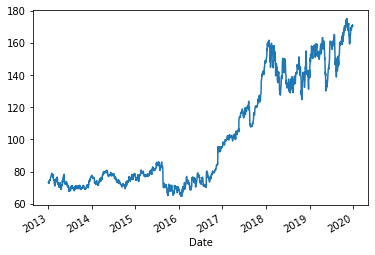

In [ ]:
all_data['Adj Close'].plot()

In [ ]:
print("There are "+ str(all_data[:'2018'].shape[0]) + " observations in the training data")
print("There are "+ str(all_data['2019':].shape[0]) + " observations in the test data")

There are 1510 observations in the training data
There are 251 observations in the test data


## [Learning objective 4] Create the training and test data for RNN/LSTM

In [ ]:
import pandas as pd
def ts_train_test(all_data,time_steps,for_periods):
    '''
    input: 
      data: dataframe with dates and price data
    output:
      X_train, y_train: data from 2013/1/1-2018/12/31
      X_test:  data from 2019 -
      sc:      insantiated MinMaxScaler object fit to the training data
    '''
    # create training and test set
    ts_train = all_data[:'2018'].iloc[:,0:1].values
    ts_test  = all_data['2019':].iloc[:,0:1].values
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # create training data of s samples and t time steps
    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(time_steps,ts_train_len-1): 
        X_train.append(ts_train[i-time_steps:i,0])
        y_train.append(ts_train[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    inputs = pd.concat((all_data["Adj Close"][:'2018'], all_data["Adj Close"]['2019':]),axis=0).values
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)

    # Preparing X_test
    X_test = []
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])
        
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test

X_train, y_train, X_test = ts_train_test(all_data,5,2)
X_train.shape[0],X_train.shape[1]

(1504, 5)

In [ ]:
# Make the 3-D shape to a data frame so we can see: 
X_train_see = pd.DataFrame(np.reshape(X_train, (X_train.shape[0],X_train.shape[1])))
y_train_see = pd.DataFrame(y_train)
pd.concat([X_train_see,y_train_see],axis=1)

,0,1,2,3,4,0,1
0,73.11,72.93,73.68,73.62,72.86,74.00,74.71
1,72.93,73.68,73.62,72.86,74.00,74.71,74.47
2,73.68,73.62,72.86,74.00,74.71,74.47,74.67
3,73.62,72.86,74.00,74.71,74.47,74.67,74.56
4,72.86,74.00,74.71,74.47,74.67,74.56,74.42
...,...,...,...,...,...,...,...
1499,142.37,139.57,142.58,139.57,138.20,136.62,131.26
1500,139.57,142.58,139.57,138.20,136.62,131.26,136.89
1501,142.58,139.57,138.20,136.62,131.26,136.89,140.18
1502,139.57,138.20,136.62,131.26,136.89,140.18,139.53


In [ ]:
# Make the 3-D shape to a data frame so we can see: 
X_test_see = pd.DataFrame(np.reshape(X_test, (X_test.shape[0],X_test.shape[1])))
pd.DataFrame(X_test_see)

,0,1,2,3,4
0,131.26,136.89,140.18,139.53,143.27
1,136.89,140.18,139.53,143.27,142.24
2,140.18,139.53,143.27,142.24,138.35
3,139.53,143.27,142.24,138.35,145.68
4,143.27,142.24,138.35,145.68,148.06
...,...,...,...,...,...
244,169.29,168.00,168.34,169.31,168.11
245,168.00,168.34,169.31,168.11,168.26
246,168.34,169.31,168.11,168.26,170.10
247,169.31,168.11,168.26,170.10,170.49


In [ ]:
print("There are " + str(X_train.shape[0]) + " samples in the training data")
print("There are " + str(X_test.shape[0]) + " samples in the test data")

There are 1504 samples in the training data
There are 249 samples in the test data


## [Learning objective 5] Run a simple RNN model

In [ ]:
def simple_rnn_model(X_train, y_train, X_test):
    '''
    create single layer rnn model trained on X_train and y_train
    and make predictions on the X_test data
    '''
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN
    
    my_rnn_model = Sequential()
    my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    my_rnn_model.add(SimpleRNN(32))
    my_rnn_model.add(Dense(2)) # The time step of the output

    my_rnn_model.compile(optimizer='rmsprop', loss='mean_squared_error')

    # fit the RNN model
    my_rnn_model.fit(X_train, y_train, epochs=100, batch_size=150, verbose=0)

    # Finalizing predictions
    rnn_predictions = my_rnn_model.predict(X_test)

    return my_rnn_model, rnn_predictions

my_rnn_model, rnn_predictions = simple_rnn_model(X_train, y_train, X_test)
rnn_predictions[1:10]

array([[38.494755, 39.12044 ],
       [38.494755, 39.12044 ],
       [38.494755, 39.12044 ],
       [38.494755, 39.12044 ],
       [38.494755, 39.12044 ],
       [38.494755, 39.12044 ],
       [38.494755, 39.12044 ],
       [38.494755, 39.12044 ],
       [38.494755, 39.12044 ]], dtype=float32)

(14021.001, <matplotlib.axes._subplots.AxesSubplot at 0x7f24660bb610>)

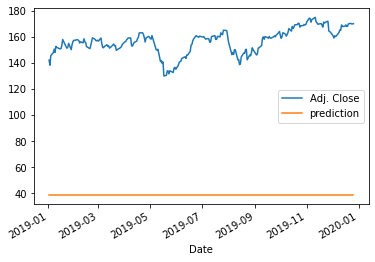

In [ ]:
def actual_pred_plot(preds):
    actual_pred = pd.DataFrame(columns = ['Adj. Close', 'prediction'])
    actual_pred['Adj. Close'] = all_data.loc['2019':,'Adj Close'][0:len(preds)]
    actual_pred['prediction'] = preds[:,0]

    from keras.metrics import MeanSquaredError
    m = MeanSquaredError()
    m.update_state(np.array(actual_pred['Adj. Close']),np.array(actual_pred['prediction']))
    
    return (m.result().numpy(), actual_pred.plot() )
    
actual_pred_plot(rnn_predictions)  

## [Learning objective 6] RNN/LTSM requires normalized input data

(53.355305, <matplotlib.axes._subplots.AxesSubplot at 0x7f2465cc3610>)

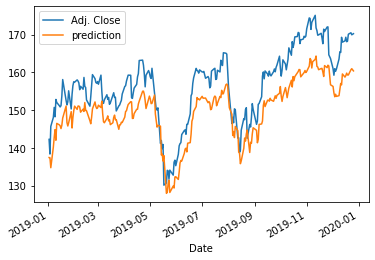

In [ ]:
def ts_train_test_normalize(all_data,time_steps,for_periods):
    '''
    input: 
      data: dataframe with dates and price data
    output:
      X_train, y_train: data from 2013/1/1-2018/12/31
      X_test:  data from 2019 -
      sc:      insantiated MinMaxScaler object fit to the training data
    '''
    # create training and test set
    ts_train = all_data[:'2018'].iloc[:,0:1].values
    ts_test  = all_data['2019':].iloc[:,0:1].values
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # scale the data
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range=(0,1))
    ts_train_scaled = sc.fit_transform(ts_train)

    # create training data of s samples and t time steps
    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(time_steps,ts_train_len-1): 
        X_train.append(ts_train_scaled[i-time_steps:i,0])
        y_train.append(ts_train_scaled[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    inputs = pd.concat((all_data["Adj Close"][:'2018'], all_data["Adj Close"]['2019':]),axis=0).values
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)
    inputs  = sc.transform(inputs)

    # Preparing X_test
    X_test = []
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])
        
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test, sc

def simple_rnn_model(X_train, y_train, X_test, sc):
    '''
    create single layer rnn model trained on X_train and y_train
    and make predictions on the X_test data
    '''
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN
    
    my_rnn_model = Sequential()
    my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    my_rnn_model.add(SimpleRNN(32))
    my_rnn_model.add(Dense(2)) # The time step of the output

    my_rnn_model.compile(optimizer='rmsprop', loss='mean_squared_error')

    # fit the RNN model
    my_rnn_model.fit(X_train, y_train, epochs=100, batch_size=150, verbose=0)

    # Finalizing predictions
    rnn_predictions = my_rnn_model.predict(X_test)
    from sklearn.preprocessing import MinMaxScaler
    rnn_predictions = sc.inverse_transform(rnn_predictions)

    return my_rnn_model, rnn_predictions


X_train, y_train, X_test, sc = ts_train_test_normalize(all_data,5,2)
my_rnn_model, rnn_predictions_2 = simple_rnn_model(X_train, y_train, X_test, sc)
rnn_predictions_2[1:10]
actual_pred_plot(rnn_predictions_2)   

## [Learning objective 7] LSTM

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


(31.02326, <matplotlib.axes._subplots.AxesSubplot at 0x7f24652a5290>)

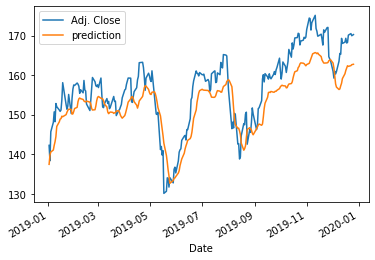

In [ ]:
def LSTM_model(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, LSTM
    from keras.optimizers import SGD
    
    # The LSTM architecture
    my_LSTM_model = Sequential()
    my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_LSTM_model.add(LSTM(units=50, activation='tanh'))
    my_LSTM_model.add(Dense(units=2))

    # Compiling
    my_LSTM_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_LSTM_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    LSTM_prediction = my_LSTM_model.predict(X_test)
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)

    return my_LSTM_model, LSTM_prediction

my_LSTM_model, LSTM_prediction = LSTM_model(X_train, y_train, X_test, sc)
LSTM_prediction[1:10]
actual_pred_plot(LSTM_prediction)   

## [Learning objective 8] LSTM Regularization

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


(30.927717, <matplotlib.axes._subplots.AxesSubplot at 0x7f24604c7c10>)

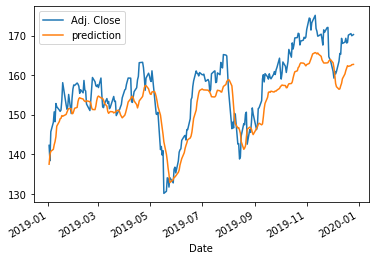

In [ ]:
def LSTM_model_regularization(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, LSTM
    from keras.optimizers import SGD
    
    # The LSTM architecture
    my_LSTM_model = Sequential()
    my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_LSTM_model.add(LSTM(units=50, activation='tanh'))
    my_LSTM_model.add(Dense(units=2))

    # Compiling
    my_LSTM_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_LSTM_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    LSTM_prediction = my_LSTM_model.predict(X_test)
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)

    return my_LSTM_model, LSTM_prediction

my_LSTM_model, LSTM_prediction = LSTM_model_regularization(X_train, y_train, X_test, sc)
LSTM_prediction[1:10]
actual_pred_plot(LSTM_prediction)  

## [Learning objective 9] GRU

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


(14.810825, <matplotlib.axes._subplots.AxesSubplot at 0x7f245f0e40d0>)

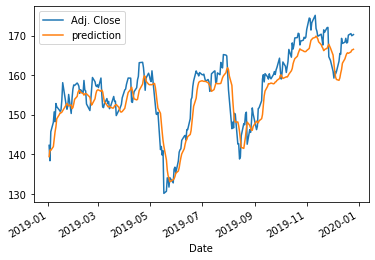

In [ ]:
def GRU_model(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU
    from keras.optimizers import SGD
    
    # The GRU architecture
    my_GRU_model = Sequential()
    # First GRU layer with Dropout regularisation
    my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_GRU_model.add(GRU(units=50, activation='tanh'))
    my_GRU_model.add(Dense(units=2))

    # Compiling the RNN
    my_GRU_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_GRU_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    GRU_prediction = my_GRU_model.predict(X_test)
    GRU_prediction = sc.inverse_transform(GRU_prediction)

    return my_GRU_model, GRU_prediction

my_GRU_model, GRU_prediction = GRU_model(X_train, y_train, X_test, sc)
GRU_prediction[1:10]
actual_pred_plot(GRU_prediction)  

## [Learning objective 10] GRU Regularization

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


(14.810825, <matplotlib.axes._subplots.AxesSubplot at 0x7f2460df15d0>)

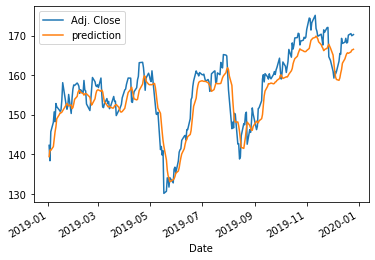

In [ ]:
def GRU_model_regularization(X_train, y_train, X_test, sc):
    '''
    create GRU model trained on X_train and y_train
    and make predictions on the X_test data
    '''
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU
    from keras.optimizers import SGD
    from keras.layers import Dropout
    
    # The GRU architecture
    my_GRU_model = Sequential()
    # First GRU layer with Dropout regularisation
    my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    # Second GRU layer
    my_GRU_model.add(GRU(units=50, return_sequences=True, activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    
    # Third GRU layer
    my_GRU_model.add(GRU(units=50, return_sequences=True, activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    # Fourth GRU layer
    my_GRU_model.add(GRU(units=50, activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    # The output layer
    my_GRU_model.add(Dense(units=1))
    # Compiling the RNN
    my_GRU_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_GRU_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    GRU_predictions = my_GRU_model.predict(X_test)
    GRU_predictions = sc.inverse_transform(GRU_predictions)

    return my_GRU_model, GRU_predictions

my_GRU_model, GRU_predictions = GRU_model_regularization(X_train, y_train, X_test, sc)
GRU_predictions[1:10]
actual_pred_plot(GRU_prediction)  